### Task 1: Data Acquisition

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from scipy import stats 

In [2]:
df= pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df= pd.DataFrame(df)
df

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200   
3       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
4       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
...           ...                     ...                     ...       ...   
825207  231604807  01/27/2023 12:00:00 AM  01/26/2023 12:00:00 AM      1800   
825208  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
825209  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
825210  230115220  07/02/2023 12:00:00 AM  07/01/2023 12:00:00 AM         1   
825211  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2          1      Central          155         2     845   
3         15  N Hollywood         1543         2     745   
4         19      Mission         1998         2     740   
...      ...          ...          ...       ...     ...   
825207    16     Foothill         1663         2     740   
825208    16     Foothill         1602         1     230   
825209    12  77th Street         1239         1     230   
825210     1      Central          154         1     352   
825211     9     Van Nuys          914         2     745   

                                              Crm Cd Desc  ... Status  \
0                                BATTERY - SIMPLE ASSAULT  ...     AO   
1                                BATTERY - SIMPLE ASSAULT  ...     IC   
2               SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
...                                                   ...  ...    ...   
825207  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
825208     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   
825209     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   
825210                                         PICKPOCKET  ...     IC   
825211           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   

         Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0        Adult Other    624.0      NaN       NaN      NaN   
1        Invest Cont    624.0      NaN       NaN      NaN   
2       Adult Arrest    845.0      NaN       NaN      NaN   
3        Invest Cont    745.0    998.0       NaN      NaN   
4        Invest Cont    740.0      NaN       NaN      NaN   
...              ...      ...      ...       ...      ...   
825207   Invest Cont    740.0      NaN       NaN      NaN   
825208   Invest Cont    230.0      NaN       NaN      NaN   
825209   Invest Cont    230.0      NaN       NaN      NaN   
825210   Invest Cont    352.0      NaN       NaN      NaN   
825211   Invest Cont    745.0      NaN       NaN      NaN   

                                        LOCATION Cross Street      LAT  \
0        1100 W  39TH                         PL          NaN  34.0141   
1         700 S  HILL                         ST          NaN  34.0459   
2         200 E  6TH                          ST          NaN  34.0448   
3        5400    CORTEEN                      PL          NaN  34.1685   
4       14400    TITUS                        ST          NaN  34.2198   
...                                          ...          ...      ...   
825207  12500    BRANFORD                     ST          NaN  34.2466   
825208  12800    FILMORE                      ST          NaN  34.2790   
825209   6100 S  VERMONT                      AV          NaN  33.

### Task 2: Data Inspection:

In [3]:
#Displaying first few rows of data to start inspection
df.head(22)

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0    10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1   190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2   200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3   191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4   191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   
5   200100501  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM        30     1   
6   200100502  01/02/2020 12:00:00 AM  01/02/2020 12:00:00 AM      1315     1   
7   200100504  01/04/2020 12:00:00 AM  01/04/2020 12:00:00 AM        40     1   
8   200100507  01/04/2020 12:00:00 AM  01/04/2020 12:00:00 AM       200     1   
9   201710201  06/19/2020 12:00:00 AM  05/26/2020 12:00:00 AM      1925    17   
10  200100509  01/04/2020 12:00:00 AM  01/04/2020 12:00:00 AM      2200     1   
11  200100510  01/05/2020 12:00:00 AM  01/05/2020 12:00:00 AM       955     1   
12  200100514  01/05/2020 12:00:00 AM  01/05/2020 12:00:00 AM      1355     1   
13  200100515  01/07/2020 12:00:00 AM  01/07/2020 12:00:00 AM      1638     1   
14  200100520  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      1805     1   
15  211916029  11/26/2021 12:00:00 AM  11/30/2020 12:00:00 AM       730    19   
16  201116159  11/29/2020 12:00:00 AM  11/28/2020 12:00:00 AM      2018    11   
17  200506268  02/22/2020 12:00:00 AM  02/22/2020 12:00:00 AM      1900     5   
18  210916801  11/22/2021 12:00:00 AM  11/19/2020 12:00:00 AM      1200     9   
19  200100535  01/14/2020 12:00:00 AM  01/14/2020 12:00:00 AM      1330     1   
20  200914517  09/10/2020 12:00:00 AM  09/09/2020 12:00:00 AM      1735     9   
21  200100538  01/14/2020 12:00:00 AM  01/14/2020 12:00:00 AM      1730     1   

      AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0     Southwest          377         2     624   
1       Central          163         2     624   
2       Central          155         2     845   
3   N Hollywood         1543         2     745   
4       Mission         1998         2     740   
5       Central          163         1     121   
6       Central          161         1     442   
7       Central          155         2     946   
8       Central          101         1     341   
9    Devonshire         1708         1     341   
10      Central          192         1     330   
11      Central          111         2     930   
12      Central          162         1     341   
13      Central          162         1     648   
14      Central          128         1     442   
15      Mission         1916         2     626   
16    Northeast         1124         2     626   
17       Harbor          511         1     440   
18     Van Nuys          932         2     354   
19      Central          152         1     210   
20     Van Nuys          909         2     354   
21      Central          162         1     341   

                                          Crm Cd Desc  ... Status  \
0                            BATTERY - SIMPLE ASSAULT  ...     AO   
1                            BATTERY - SIMPLE ASSAULT  ...     IC   
2           SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3            VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4   VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
5                                      RAPE, FORCIBLE  ...     IC   
6            SHOPLIFTING - PETTY THEFT ($950 & UNDER)  ...     IC   
7                           OTHER MISCELLANEOUS CRIME  ...     IC   
8   THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...  ...     IC   
9   THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...  ...     AO   
10                              BURGLARY FROM VEHICLE  ...     IC   
11             CRIMINAL THREATS - NO WEAPON DISPLAYED  ...     IC   
12  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...  ...     AA   
13                         

In [4]:
#check the data types of each column
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [5]:
#Review column names
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
#checking Statistics of Data 
df.describe().T

count          mean           std       min           25%  \
DR_NO           825212.0  2.162134e+08  1.085741e+07  817.0000  2.102064e+08   
TIME OCC        825212.0  1.335844e+03  6.539500e+02    1.0000  9.000000e+02   
AREA            825212.0  1.070994e+01  6.093458e+00    1.0000  6.000000e+00   
Rpt Dist No     825212.0  1.117420e+03  6.093388e+02  101.0000  6.210000e+02   
Part 1-2        825212.0  1.413714e+00  4.924988e-01    1.0000  1.000000e+00   
Crm Cd          825212.0  5.008060e+02  2.078098e+02  110.0000  3.310000e+02   
Vict Age        825212.0  2.979718e+01  2.177795e+01   -3.0000  7.000000e+00   
Premis Cd       825202.0  3.057969e+02  2.167366e+02  101.0000  1.010000e+02   
Weapon Used Cd  287714.0  3.629479e+02  1.237542e+02  101.0000  3.100000e+02   
Crm Cd 1        825202.0  5.005443e+02  2.075979e+02  110.0000  3.310000e+02   
Crm Cd 2         60707.0  9.574822e+02  1.114815e+02  210.0000  9.980000e+02   
Crm Cd 3          2039.0  9.835978e+02  5.290594e+01  310.0000  9.980000e+02   
Crm Cd 4            61.0  9.908689e+02  2.769024e+01  821.0000  9.980000e+02   
LAT             825212.0  3.398004e+01  1.785336e+00    0.0000  3.401370e+01   
LON             825212.0 -1.180295e+02  6.190247e+00 -118.6676 -1.184296e+02   

                         50%           75%           max  
DR_NO           2.201207e+08  2.220104e+08  2.399165e+08  
TIME OCC        1.415000e+03  1.900000e+03  2.359000e+03  
AREA            1.100000e+01  1.600000e+01  2.100000e+01  
Rpt Dist No     1.142000e+03  1.617000e+03  2.199000e+03  
Part 1-2        1.000000e+00  2.000000e+00  2.000000e+00  
Crm Cd          4.420000e+02  6.260000e+02  9.560000e+02  
Vict Age        3.100000e+01  4.500000e+01  1.200000e+02  
Premis Cd       2.030000e+02  5.010000e+02  9.760000e+02  
Weapon Used Cd  4.000000e+02  4.000000e+02  5.160000e+02  
Crm Cd 1        4.420000e+02  6.260000e+02  9.560000e+02  
Crm Cd 2        9.980000e+02  9.980000e+02  9.990000e+02  
Crm Cd 3        9.980000e+02  9.980000e+02  9.990000e+02  
Crm Cd 4        9.980000e+02  9.980000e+02  9.990000e+02  
LAT             3.405840e+01  3.416300e+01  3.433430e+01  
LON            -1.183215e+02 -1.182739e+02  0.000000e+00

In [7]:
#To check Non-Null records and Data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825212 entries, 0 to 825211
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           825212 non-null  int64  
 1   Date Rptd       825212 non-null  object 
 2   DATE OCC        825212 non-null  object 
 3   TIME OCC        825212 non-null  int64  
 4   AREA            825212 non-null  int64  
 5   AREA NAME       825212 non-null  object 
 6   Rpt Dist No     825212 non-null  int64  
 7   Part 1-2        825212 non-null  int64  
 8   Crm Cd          825212 non-null  int64  
 9   Crm Cd Desc     825212 non-null  object 
 10  Mocodes         711064 non-null  object 
 11  Vict Age        825212 non-null  int64  
 12  Vict Sex        716683 non-null  object 
 13  Vict Descent    716675 non-null  object 
 14  Premis Cd       825202 non-null  float64
 15  Premis Desc     824724 non-null  object 
 16  Weapon Used Cd  287714 non-null  float64
 17  Weapon Des

### Task 3: Data Cleaning
    

In [8]:
#identify and handle missing data
#To check empty record for cleaning data
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           114148
Vict Age               0
Vict Sex          108529
Vict Descent      108537
Premis Cd             10
Premis Desc          488
Weapon Used Cd    537498
Weapon Desc       537498
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          764505
Crm Cd 3          823173
Crm Cd 4          825151
LOCATION               0
Cross Street      693343
LAT                    0
LON                    0
dtype: int64

In [9]:
#Dropping Columns with insufficient data i.e more than 80% null values
Crime_Data_df = df.drop([ 'Crm Cd 2' , 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'],axis=1)
Crime_Data_df.head(5)

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Premis Cd  \
0                           BATTERY - SIMPLE ASSAULT  ...     501.0   
1                           BATTERY - SIMPLE ASSAULT  ...     102.0   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     726.0   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     502.0   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     409.0   

                                    Premis Desc Weapon Used Cd  \
0                        SINGLE FAMILY DWELLING          400.0   
1                                      SIDEWALK          500.0   
2                               POLICE FACILITY            NaN   
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)            NaN   
4                           BEAUTY SUPPLY STORE            NaN   

                                      Weapon Desc  Status   Status Desc  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      AO   Adult Other   
1                     UNKNOWN WEAPON/OTHER WEAPON      IC   Invest Cont   
2                                             NaN      AA  Adult Arrest   
3                                             NaN      IC   Invest Cont   
4                                             NaN      IC   Invest Cont   

   Crm Cd 1                                  LOCATION      LAT       LON  
0     624.0   1100 W  39TH                         PL  34.0141 -118.2978  
1     624.0    700 S  HILL                         ST  34.0459 -118.2545  
2     845.0    200 E  6TH                          ST  34.0448 -118.2474  
3     745.0   5400    CORTEEN                      PL  34.1685 -118.4019  
4     740.0  14400    TITUS                        ST  34.2198 -118.4468  

[5 rows x 24 columns]

In [10]:
#Filling null records
Crime_Data_df['Mocodes'].fillna('unknown',inplace=True)
Crime_Data_df['Vict Sex'].fillna('unknown',inplace=True)
Crime_Data_df['Vict Descent'].fillna('unknown',inplace=True)
Crime_Data_df['Premis Cd'].fillna(0,inplace=True)
Crime_Data_df['Premis Desc'].fillna('unknown',inplace=True)
Crime_Data_df['Weapon Used Cd'].fillna(0,inplace=True)
Crime_Data_df['Weapon Desc'].fillna('unknown',inplace=True)
Crime_Data_df['Crm Cd 1'].fillna(0,inplace=True)

Crime_Data_df

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200   
3       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
4       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
...           ...                     ...                     ...       ...   
825207  231604807  01/27/2023 12:00:00 AM  01/26/2023 12:00:00 AM      1800   
825208  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
825209  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
825210  230115220  07/02/2023 12:00:00 AM  07/01/2023 12:00:00 AM         1   
825211  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2          1      Central          155         2     845   
3         15  N Hollywood         1543         2     745   
4         19      Mission         1998         2     740   
...      ...          ...          ...       ...     ...   
825207    16     Foothill         1663         2     740   
825208    16     Foothill         1602         1     230   
825209    12  77th Street         1239         1     230   
825210     1      Central          154         1     352   
825211     9     Van Nuys          914         2     745   

                                              Crm Cd Desc  ... Premis Cd  \
0                                BATTERY - SIMPLE ASSAULT  ...     501.0   
1                                BATTERY - SIMPLE ASSAULT  ...     102.0   
2               SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     726.0   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     502.0   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     409.0   
...                                                   ...  ...       ...   
825207  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     122.0   
825208     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     102.0   
825209     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     222.0   
825210                                         PICKPOCKET  ...     735.0   
825211           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     502.0   

                                         Premis Desc Weapon Used Cd  \
0                             SINGLE FAMILY DWELLING          400.0   
1                                           SIDEWALK          500.0   
2                                    POLICE FACILITY            0.0   
3       MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)            0.0   
4                                BEAUTY SUPPLY STORE            0.0   
...                                              ...            ...   
825207                      VEHICLE, PASSENGER/TRUCK            0.0   
825208                                      SIDEWALK          400.0   
825209                                    LAUNDROMAT          500.0   
825210               NIGHT CLUB (OPEN EVENINGS ONLY)            0.0   
825211  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)            0.0   

                                           Weapon Desc  Status   Status Desc  \
0       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      AO   Adult Other   
1                          UNKNOWN WEAPON/OTHER WEAPON      IC   Invest Cont   
2                                              unknown      AA  Adult Arrest   
3                                              unknown      IC   Invest Cont   
4                                              unknown      IC   Invest Cont   
...                                                ...     ...           ...   
825207          

In [11]:
#Removing duplicates
Crime_Data_df.drop_duplicates(subset='DR_NO', inplace=True)
Crime_Data_df

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200   
3       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
4       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
...           ...                     ...                     ...       ...   
825207  231604807  01/27/2023 12:00:00 AM  01/26/2023 12:00:00 AM      1800   
825208  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
825209  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
825210  230115220  07/02/2023 12:00:00 AM  07/01/2023 12:00:00 AM         1   
825211  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2          1      Central          155         2     845   
3         15  N Hollywood         1543         2     745   
4         19      Mission         1998         2     740   
...      ...          ...          ...       ...     ...   
825207    16     Foothill         1663         2     740   
825208    16     Foothill         1602         1     230   
825209    12  77th Street         1239         1     230   
825210     1      Central          154         1     352   
825211     9     Van Nuys          914         2     745   

                                              Crm Cd Desc  ... Premis Cd  \
0                                BATTERY - SIMPLE ASSAULT  ...     501.0   
1                                BATTERY - SIMPLE ASSAULT  ...     102.0   
2               SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     726.0   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     502.0   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     409.0   
...                                                   ...  ...       ...   
825207  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     122.0   
825208     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     102.0   
825209     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     222.0   
825210                                         PICKPOCKET  ...     735.0   
825211           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     502.0   

                                         Premis Desc Weapon Used Cd  \
0                             SINGLE FAMILY DWELLING          400.0   
1                                           SIDEWALK          500.0   
2                                    POLICE FACILITY            0.0   
3       MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)            0.0   
4                                BEAUTY SUPPLY STORE            0.0   
...                                              ...            ...   
825207                      VEHICLE, PASSENGER/TRUCK            0.0   
825208                                      SIDEWALK          400.0   
825209                                    LAUNDROMAT          500.0   
825210               NIGHT CLUB (OPEN EVENINGS ONLY)            0.0   
825211  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)            0.0   

                                           Weapon Desc  Status   Status Desc  \
0       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      AO   Adult Other   
1                          UNKNOWN WEAPON/OTHER WEAPON      IC   Invest Cont   
2                                              unknown      AA  Adult Arrest   
3                                              unknown      IC   Invest Cont   
4                                              unknown      IC   Invest Cont   
...                                                ...     ...           ...   
825207          

In [12]:
#changingdate columns to datetime fromat
Crime_Data_df['Date Rptd'] = pd.to_datetime(Crime_Data_df['Date Rptd'])
Crime_Data_df['DATE OCC'] = pd.to_datetime(Crime_Data_df['DATE OCC'])
Crime_Data_df['Premis Cd'] = Crime_Data_df['Premis Cd'].astype('Int64')  
Crime_Data_df['Weapon Used Cd'] = Crime_Data_df['Weapon Used Cd'].astype('Int64')

Crime_Data_df.dtypes

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                  Int64
Premis Desc               object
Weapon Used Cd             Int64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
LOCATION                  object
LAT                      float64
LON                      float64
dtype: object

#### Outliers and Anomalies:
- Use statistical methods or data visualization techniques to identify dataset outliers 
and investigate unusual patterns.

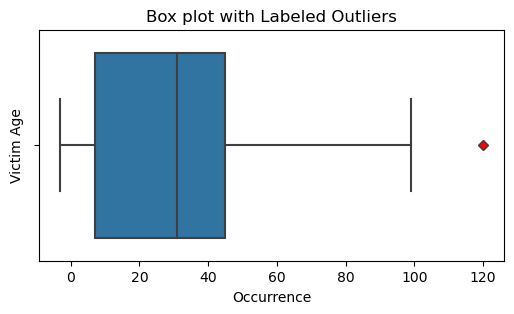

In [13]:
#Deal with outliers if relevant to your analysis.
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
sns.boxplot(x=Crime_Data_df['Vict Age'], flierprops=dict(markerfacecolor='r', marker='D'))
plt.title("Box plot with Labeled Outliers")
plt.xlabel("Occurrence")
plt.ylabel("Victim Age")
plt.show()

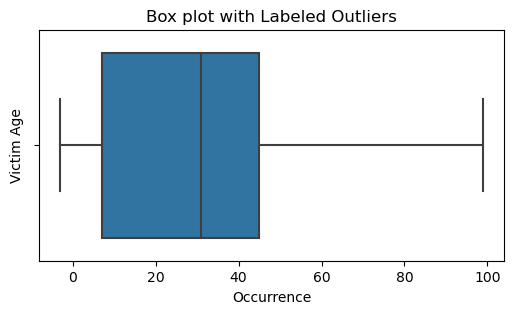

In [14]:
outlier_threshold = 100
Crime_Data_df = Crime_Data_df[Crime_Data_df['Vict Age'] <= outlier_threshold]
plt.figure(figsize=(6, 3))
sns.boxplot(x=Crime_Data_df['Vict Age'], flierprops=dict(markerfacecolor='r', marker='D'))
plt.title("Box plot with Labeled Outliers")
plt.xlabel("Occurrence")
plt.ylabel("Victim Age")
plt.show()

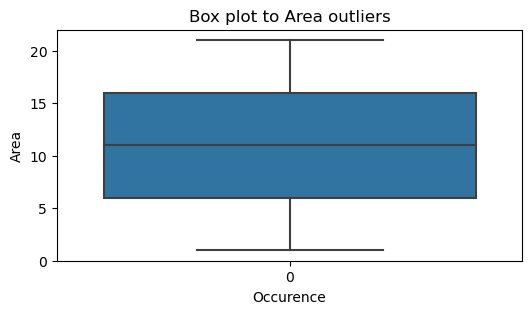

In [15]:
plt.figure(figsize=(6, 3))
sns.boxplot(Crime_Data_df['AREA'])
plt.title("Box plot to Area outliers")
plt.xlabel("Occurence")
plt.ylabel("Area")
plt.show()

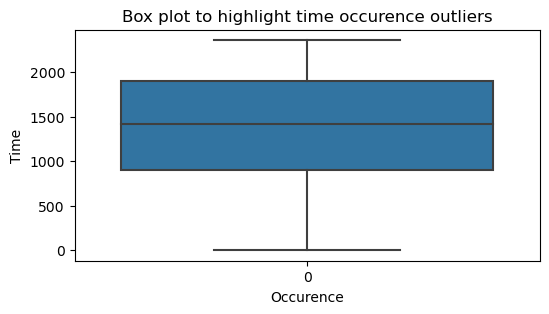

In [16]:
plt.figure(figsize=(6, 3))
sns.boxplot(Crime_Data_df['TIME OCC'])
plt.title("Box plot to highlight time occurence outliers")
plt.xlabel("Occurence")
plt.ylabel("Time")
plt.show()

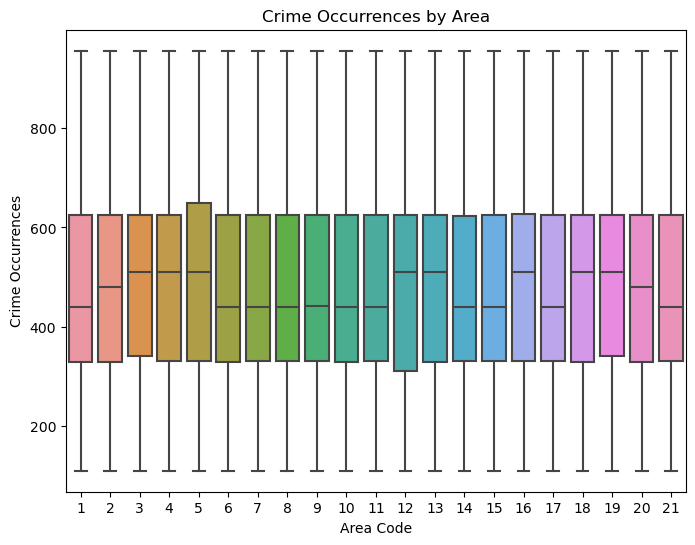

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='AREA', y='Crm Cd', data=Crime_Data_df)
plt.title('Crime Occurrences by Area')
plt.xlabel('Area Code')
plt.ylabel('Crime Occurrences')
plt.show()

In [18]:
#standardizing numerical values
Crime_Data_df['LAT'] = stats.zscore(Crime_Data_df['LAT'])
Crime_Data_df['LON'] = stats.zscore(Crime_Data_df['LON'])

Crime_Data_df

C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_27912\2503342838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crime_Data_df['LAT'] = stats.zscore(Crime_Data_df['LAT'])
C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_27912\2503342838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crime_Data_df['LON'] = stats.zscore(Crime_Data_df['LON'])


DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA    AREA NAME  \
0        10304468 2020-01-08 2020-01-08      2230     3    Southwest   
1       190101086 2020-01-02 2020-01-01       330     1      Central   
2       200110444 2020-04-14 2020-02-13      1200     1      Central   
3       191501505 2020-01-01 2020-01-01      1730    15  N Hollywood   
4       191921269 2020-01-01 2020-01-01       415    19      Mission   
...           ...        ...        ...       ...   ...          ...   
825207  231604807 2023-01-27 2023-01-26      1800    16     Foothill   
825208  231606525 2023-03-22 2023-03-22      1000    16     Foothill   
825209  231210064 2023-04-12 2023-04-12      1630    12  77th Street   
825210  230115220 2023-07-02 2023-07-01         1     1      Central   
825211  230906458 2023-03-05 2023-03-05       900     9     Van Nuys   

        Rpt Dist No  Part 1-2  Crm Cd  \
0               377         2     624   
1               163         2     624   
2               155         2     845   
3              1543         2     745   
4              1998         2     740   
...             ...       ...     ...   
825207         1663         2     740   
825208         1602         1     230   
825209         1239         1     230   
825210          154         1     352   
825211          914         2     745   

                                              Crm Cd Desc  ... Premis Cd  \
0                                BATTERY - SIMPLE ASSAULT  ...       501   
1                                BATTERY - SIMPLE ASSAULT  ...       102   
2               SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...       726   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...       502   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...       409   
...                                                   ...  ...       ...   
825207  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...       122   
825208     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...       102   
825209     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...       222   
825210                                         PICKPOCKET  ...       735   
825211           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...       502   

                                         Premis Desc Weapon Used Cd  \
0                             SINGLE FAMILY DWELLING            400   
1                                           SIDEWALK            500   
2                                    POLICE FACILITY              0   
3       MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)              0   
4                                BEAUTY SUPPLY STORE              0   
...                                              ...            ...   
825207                      VEHICLE, PASSENGER/TRUCK              0   
825208                                      SIDEWALK            400   
825209                                    LAUNDROMAT            500   
825210               NIGHT CLUB (OPEN EVENINGS ONLY)              0   
825211  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)              0   

                                           Weapon Desc  Status   Status Desc  \
0       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      AO   Adult Other   
1                          UNKNOWN WEAPON/OTHER WEAPON      IC   Invest Cont   
2                                              unknown      AA  Adult Arrest   
3                                              unknown      IC   Invest Cont   
4                                              unknown      IC   Invest Cont   
...                                                ...     ...           ...   
825207                                         unknown      IC   Invest Cont   
825208  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC   Invest Cont   
825209                     UNKNOWN WEAPON/OTHER WEAPON      IC   Invest Cont   
825210                                         unknown      IC   Invest Cont   
825211  

In [19]:
pip install scikit-learn

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
#selecting columns which have descriptive values(string)
Crime_Data_df_enc = Crime_Data_df.copy()
 
columns_to_encode = [ 'Vict Sex', 'Vict Descent', 'Status', 'Status Desc']
 
# Initialize LabelEncoder
label_encoder = LabelEncoder()
 
# Apply label encoding to the selected columns
for column in columns_to_encode:
    Crime_Data_df_enc[column] = label_encoder.fit_transform(Crime_Data_df_enc[column])

print(Crime_Data_df_enc['Vict Sex'])
print(Crime_Data_df_enc['Vict Descent'])
print(Crime_Data_df_enc['Status'])
print(Crime_Data_df_enc['Status Desc'])

0         1
1         3
2         4
3         1
4         4
         ..
825207    3
825208    1
825209    3
825210    1
825211    1
Name: Vict Sex, Length: 825211, dtype: int32
0          2
1          7
2         18
3         17
4         18
          ..
825207     7
825208     7
825209     2
825210     7
825211     7
Name: Vict Descent, Length: 825211, dtype: int32
0         1
1         3
2         0
3         3
4         3
         ..
825207    3
825208    3
825209    3
825210    3
825211    3
Name: Status, Length: 825211, dtype: int32
0         1
1         2
2         0
3         2
4         2
         ..
825207    2
825208    2
825209    2
825210    2
825211    2
Name: Status Desc, Length: 825211, dtype: int32


### Task 4: Exploratory Data Analysis (EDA):

#### Overall Crime Trends:
Calculate and plot the total number of crimes per year to visualize the trends.

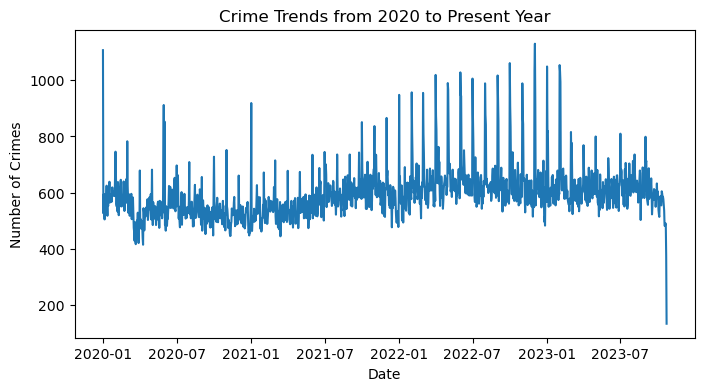

In [22]:
#Visualize overall crime trends from 2020 to current year.
from datetime import datetime
 
# Filter data for the specified date range (from 2020 to the present year)
start_date = '2020-01-01'
current_datetime = datetime.now()
end_date = pd.to_datetime(current_datetime)
 
filter_data = Crime_Data_df[(Crime_Data_df['DATE OCC'] >= start_date) & (Crime_Data_df['DATE OCC'] <= end_date)]
crime_trends = filter_data.groupby(filter_data['DATE OCC'].dt.date)['DR_NO'].count()
 
plt.figure(figsize=(8, 4))
crime_trends.plot()
plt.title('Crime Trends from 2020 to Present Year')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_27912\488697843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crime_Data_df['DATE OCC'] = pd.to_datetime(Crime_Data_df['DATE OCC'])


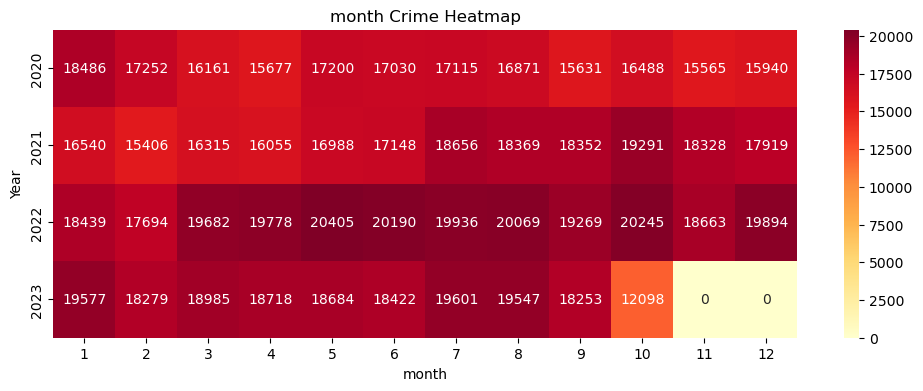

In [23]:
# Analyze and visualize seasonal patterns in crime data
Crime_Data_df['DATE OCC'] = pd.to_datetime(Crime_Data_df['DATE OCC'])

# Create a pivot table to aggregate crime counts by month
monthly_crime_counts = Crime_Data_df.pivot_table(index=Crime_Data_df['DATE OCC'].dt.year,
                                             columns=Crime_Data_df['DATE OCC'].dt.month,
                                             values='Crm Cd', aggfunc='count',
                                             fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(monthly_crime_counts, cmap='YlOrRd', annot=True, fmt='d')
plt.title('month Crime Heatmap')
plt.xlabel('month')
plt.ylabel('Year')
plt.show()


####  Seasonal Patterns:
Group the data by month and analyze the average number of crimes per month over 
the years

C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_27912\3437862874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crime_Data_df['Month'] = Crime_Data_df['DATE OCC'].dt.month


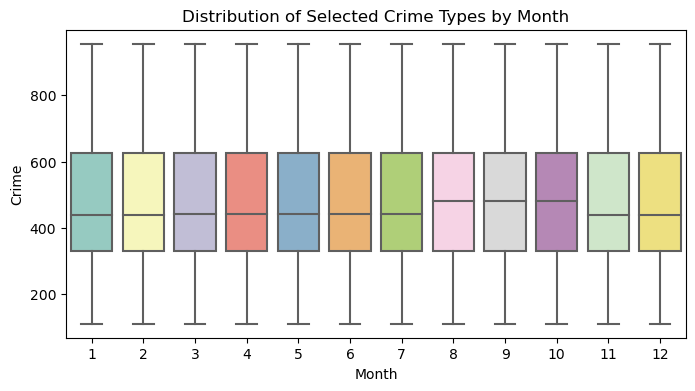

In [24]:
Crime_Data_df['Month'] = Crime_Data_df['DATE OCC'].dt.month

# Create a box plot to compare the distribution of selected crime types by month
plt.figure(figsize=(8, 4))
sns.boxplot(x='Month', y='Crm Cd', data=Crime_Data_df, palette='Set3')
plt.title('Distribution of Selected Crime Types by Month')
plt.xlabel('Month')
plt.ylabel('Crime')
plt.show()

#### Most Common Crime Type:
Count the occurrences of each crime type and identify the one with the highest 
frequency.

In [25]:
# Identify the most common type of crime and its trends over time.
crime_counts = Crime_Data_df['Crm Cd Desc'].value_counts()

most_common_crime = crime_counts.idxmax()
print("The most common type of crime is:", most_common_crime)

The most common type of crime is: VEHICLE - STOLEN


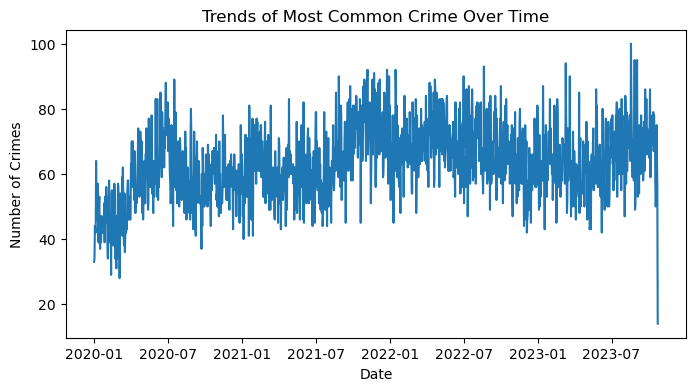

In [26]:
common_crime_data = Crime_Data_df[Crime_Data_df['Crm Cd Desc'] == most_common_crime]

crime_trends = common_crime_data.groupby(common_crime_data['DATE OCC'].dt.date)['DR_NO'].count()

plt.figure(figsize=(8, 4))
crime_trends.plot()
plt.title('Trends of Most Common Crime Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

#### Regional Differences:
Group the data by region or city and compare crime rates between them using 
descriptive statistics or visualizations.

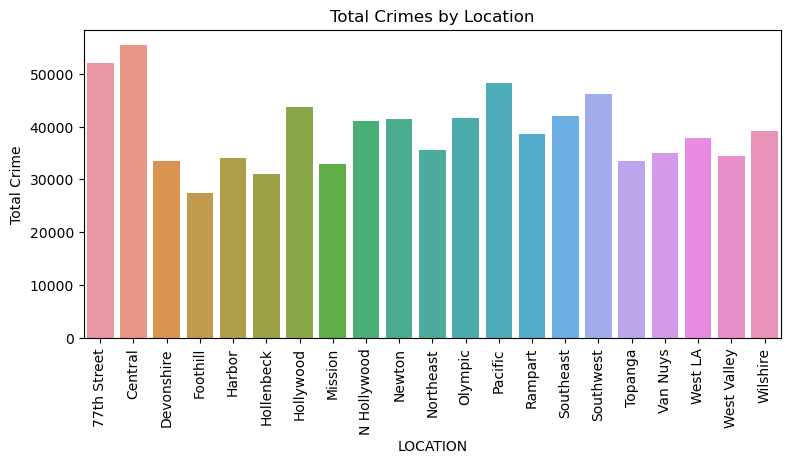

In [27]:
#Investigate if there are any notable differences in crime rates between regions or cities.
crime_rates_location_wise = Crime_Data_df.groupby('AREA NAME')['Crm Cd'].count().reset_index(name='Total Crime')

plt.figure(figsize=(9, 4))
sns.barplot(x=crime_rates_location_wise['AREA NAME'], y=crime_rates_location_wise['Total Crime'])
plt.title('Total Crimes by Location')
plt.xlabel('LOCATION')
plt.ylabel('Total Crime')
plt.xticks(rotation=90)
plt.show()


####  Correlation with Economic Factors:
Collect economic data for the same time frame and use statistical methods like 
correlation analysis to assess the relationship between economic factors and crime 
rates.

In [28]:
#Explore correlations between economic factors (if available) and crime rates.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample data for economic factors and crime rates
data = {
    'Year': range(2020, 2024),
    'GDP': [1700, 1800, 1900, 2000],
    'Unemployment_Rate': [4.1, 4.0, 3.9, 3.8],
}

# Create a DataFrame from the sample data
df_eco = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_eco.to_csv('economic_and_crime_data.csv', index=False)


In [29]:
economic_dataset = pd.read_csv('economic_and_crime_data.csv')
economic_dataset

Year   GDP  Unemployment_Rate
0  2020  1700                4.1
1  2021  1800                4.0
2  2022  1900                3.9
3  2023  2000                3.8

In [30]:
# Create a pivot table to aggregate crime counts by year
yearly_crime_rate = Crime_Data_df.groupby(Crime_Data_df['DATE OCC'].dt.year)['Crm Cd'].count()

# Rename columns and create a DataFrame
yearly_crime_rate = yearly_crime_rate.reset_index()
yearly_crime_rate.columns = ['Year', 'Crime_Rate']

yearly_crime_rate_df = pd.DataFrame(yearly_crime_rate)

# Display the resulting DataFrame
print(yearly_crime_rate_df)

   Year  Crime_Rate
0  2020      199416
1  2021      209367
2  2022      234264
3  2023      182164


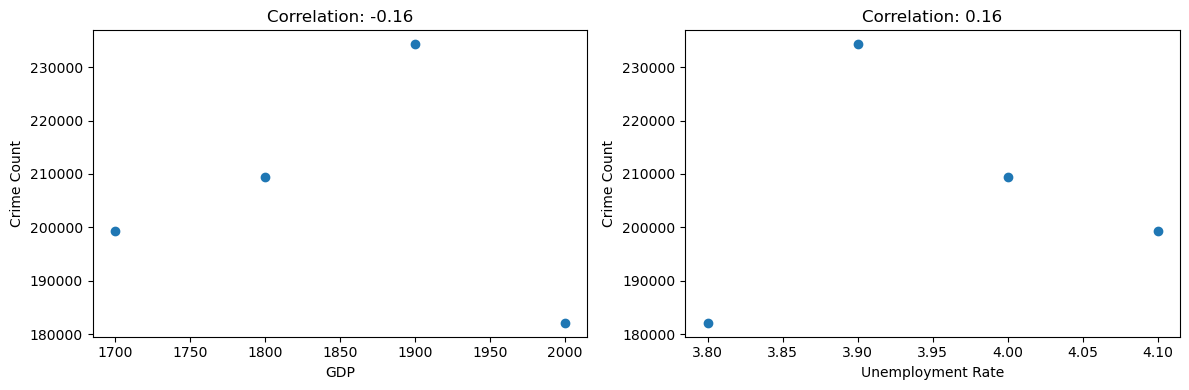

In [31]:
# Merge the data based on the 'Year' column
merged_data = pd.merge(economic_dataset, yearly_crime_rate_df, on='Year', how='inner')

# Calculate the correlation coefficients
correlation_gdp = merged_data['GDP'].corr(merged_data['Crime_Rate'])
correlation_unemployment = merged_data['Unemployment_Rate'].corr(merged_data['Crime_Rate'])

# Create scatterplots to visualize the relationships
plt.figure(figsize=(12, 4))

# GDP vs. Crime_Count
plt.subplot(1, 2, 1)
plt.scatter(merged_data['GDP'], merged_data['Crime_Rate'])
plt.xlabel('GDP')
plt.ylabel('Crime Count')
plt.title(f'Correlation: {correlation_gdp:.2f}')

# Unemployment Rate vs. Crime_Count
plt.subplot(1, 2, 2)
plt.scatter(merged_data['Unemployment_Rate'], merged_data['Crime_Rate'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Crime Count')
plt.title(f'Correlation: {correlation_unemployment:.2f}')

plt.tight_layout()
plt.show()

#### Day of the Week Analysis:
Group the data by day of the week and analyze crime frequencies for each day. 

C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_27912\3049055518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crime_Data_df['Day of Week'] = Crime_Data_df['DATE OCC'].dt.day_name()


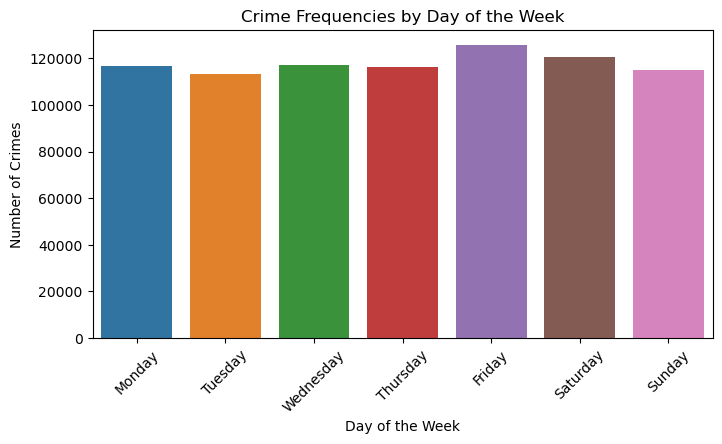

In [32]:
# Analyze the relationship between the day of the week and the frequency of certain types of crimes.
Crime_Data_df['Day of Week'] = Crime_Data_df['DATE OCC'].dt.day_name()

crime_counts_by_day = Crime_Data_df['Day of Week'].value_counts()

days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_counts_by_day = crime_counts_by_day.reindex(days_of_week_order)

plt.figure(figsize=(8, 4))
sns.barplot(x=crime_counts_by_day.index, y=crime_counts_by_day.values)
plt.title('Crime Frequencies by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


#### Impact of Major Events:
- Identify major events or policy changes during the dataset period and analyze crime 
rate changes before and after these events.

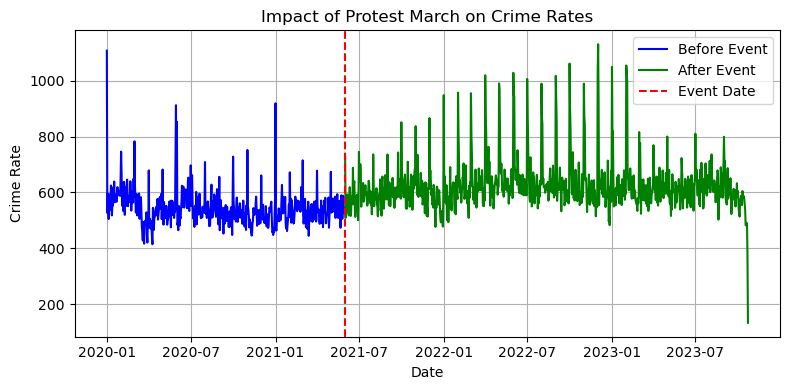

In [33]:
from scipy.stats import ttest_ind

events_data = pd.DataFrame({
    'Event_Date': ['2021-06-01'],
    'Event_Description': ['Policy Change']
})
events_data['Event_Date'] = pd.to_datetime(events_data['Event_Date'])

# Create a pivot table to aggregate crime counts by year
daily_crime_rate = Crime_Data_df.groupby(['DATE OCC']).size().reset_index(name='Crime_Rate')

event_date = pd.to_datetime('2021-06-01')

# Filter the daily crime data for Event 1
before_event = daily_crime_rate[daily_crime_rate['DATE OCC'] < event_date]
after_event = daily_crime_rate[daily_crime_rate['DATE OCC'] >= event_date]

# Create a line plot
plt.figure(figsize=(8, 4))
plt.plot(before_event['DATE OCC'], before_event['Crime_Rate'], label='Before Event', color='blue')
plt.plot(after_event['DATE OCC'], after_event['Crime_Rate'], label='After Event', color= 'green')

# Add a vertical line to indicate the event date
plt.axvline(x=event_date, color='red', linestyle='--', label='Event Date')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.title('Impact of Protest March on Crime Rates')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### Demographic Factors:
-  Analyze the dataset to identify any patterns or correlations between demographic 
factors (e.g., age, gender) and specific types of crimes

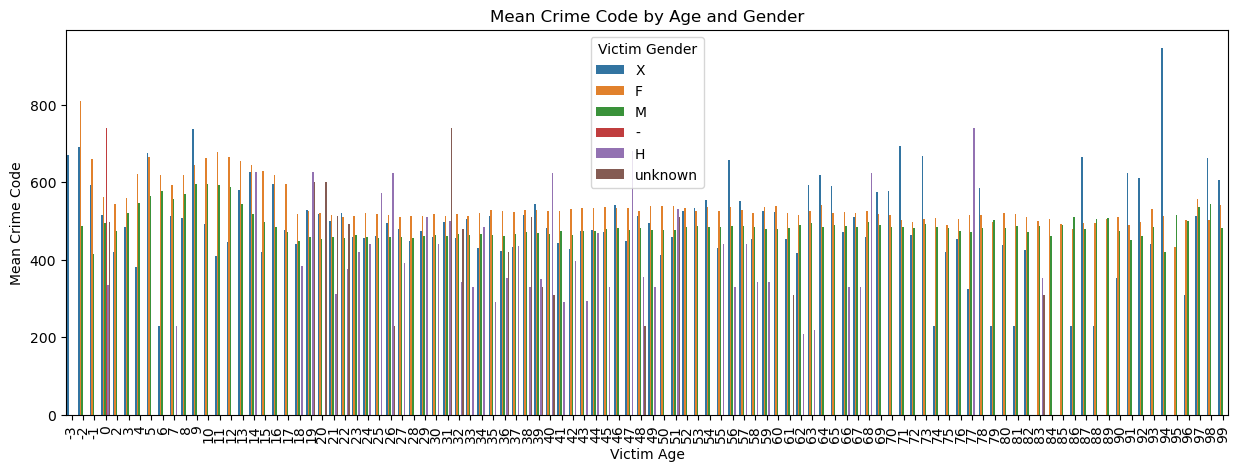

In [34]:
age_sex_crime_mean = Crime_Data_df.groupby(['Vict Age', 'Vict Sex'])['Crm Cd'].mean().reset_index()

# Create a bar plot to visualize the mean crime code by age and gender
plt.figure(figsize=(15, 5))
sns.barplot(x='Vict Age', y='Crm Cd', hue='Vict Sex', data=age_sex_crime_mean)
plt.title('Mean Crime Code by Age and Gender')
plt.xlabel('Victim Age')
plt.ylabel('Mean Crime Code')
plt.legend(title='Victim Gender')
plt.xticks(rotation=90)
plt.show()


### Task 5: Advanced Analysis (Optional)

#### Predicting Future Trends:
- Employ time series forecasting methods, such as ARIMA or Prophet, to predict 
future crime trends based on historical data. Consider incorporating relevant 
external factors into your models

C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_27912\3152574620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crime_Data_df['DATE OCC'] = pd.to_datetime(Crime_Data_df['DATE OCC'])


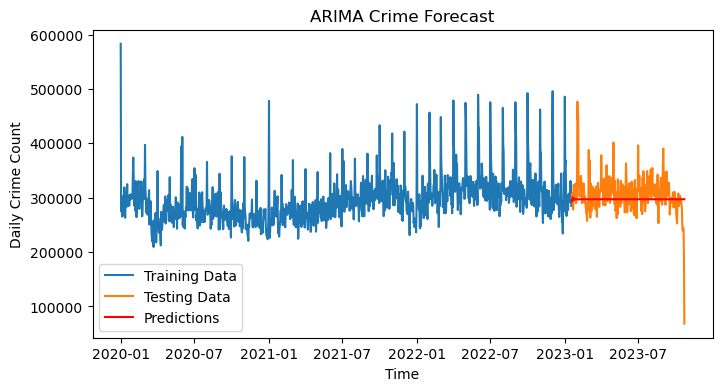

In [35]:
# Use predictive modeling techniques (e.g., time series forecasting) to predict future crime trends.
from statsmodels.tsa.arima.model import ARIMA

# Assuming the correct date column is 'DATE OCC'
Crime_Data_df['DATE OCC'] = pd.to_datetime(Crime_Data_df['DATE OCC'])
Crime_Data_df.set_index('DATE OCC', inplace=True)

# Resample the data to a daily frequency and aggregate by sum to get daily crime counts
daily_crime_data = Crime_Data_df['Crm Cd'].resample('D').sum()

# Check for missing dates and fill with 0 if needed
daily_crime_data = daily_crime_data.asfreq('D', fill_value=0)

# Split the data into training and testing sets
train_size = int(len(daily_crime_data) * 0.8)
train, test = daily_crime_data.iloc[:train_size], daily_crime_data.iloc[train_size:]

# Train the ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Make predictions for future time points
n_forecast = len(test)  # You can adjust this for the number of days you want to forecast
predictions = model_fit.forecast(steps=n_forecast)

# Plot the original data and predictions
plt.figure(figsize=(8, 4))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Testing Data')
plt.plot(test.index, predictions, color='red', label='Predictions')
plt.legend()
plt.title('ARIMA Crime Forecast')
plt.xlabel('Time')
plt.ylabel('Daily Crime Count')
plt.show()